In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.shape

(6362620, 11)

In [10]:
round(df['isFraud'].value_counts()[1]/df.shape[0])

0

In [11]:
# Total fradulent transactions percentage:
round((df['isFraud'].value_counts()[1] / df.shape[0])*100, 2)

0.13

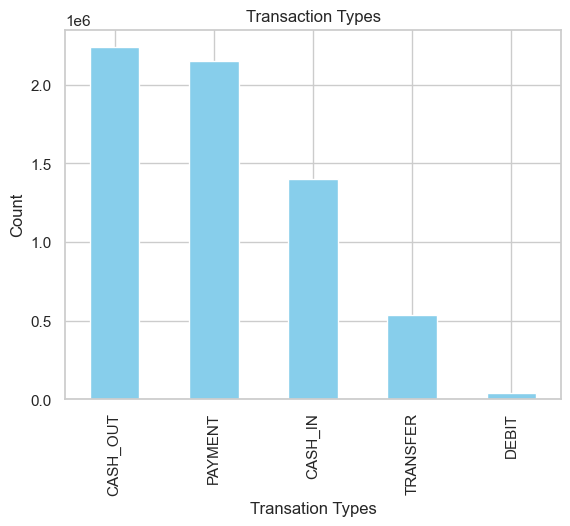

In [12]:
df['type'].value_counts().plot(kind='bar',title='Transaction Types',color='skyblue')
plt.xlabel('Transation Types')
plt.ylabel('Count')
plt.show()

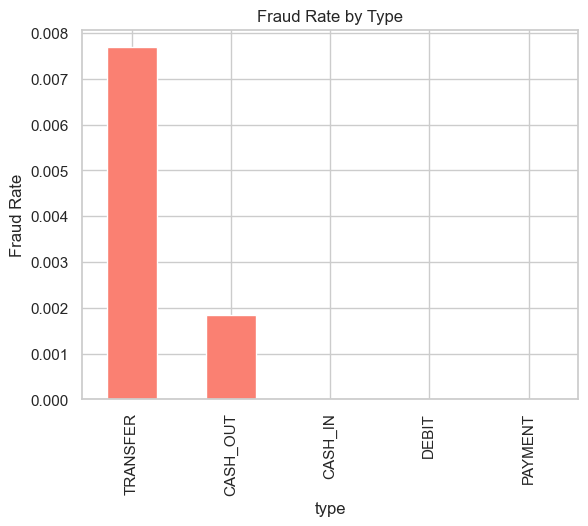

In [13]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending = False)
fraud_by_type.plot(kind='bar',title='Fraud Rate by Type',color='salmon')
plt.ylabel('Fraud Rate')
plt.show()

In [14]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

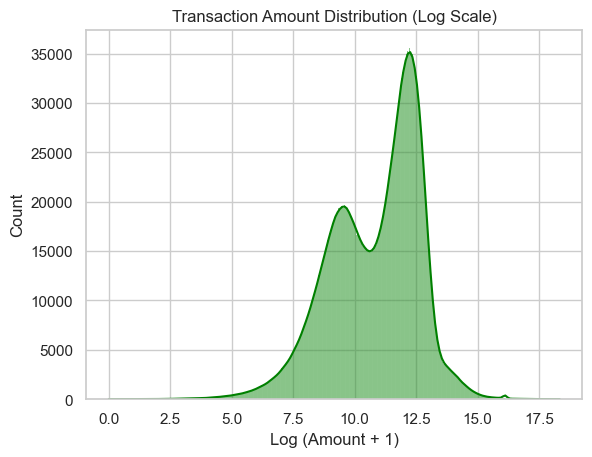

In [15]:
sns.histplot(np.log1p(df['amount']),bins=1000,kde=True,color='green')
plt.title('Transaction Amount Distribution (Log Scale)')
plt.xlabel('Log (Amount + 1)')
plt.show()

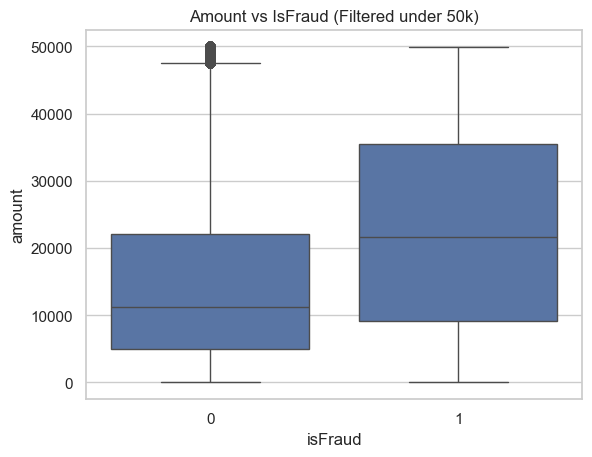

In [16]:
sns.boxplot(data=df[df['amount']<50000],x='isFraud',y='amount')
plt.title('Amount vs IsFraud (Filtered under 50k)')
plt.show()

In [17]:
df['balanceDiffOrig'] = df['oldbalanceOrg']-df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest']-df['oldbalanceDest']

In [18]:
(df['balanceDiffOrig'] <0).sum()

1399253

In [19]:
(df['balanceDiffDest'] <0).sum()

1238864

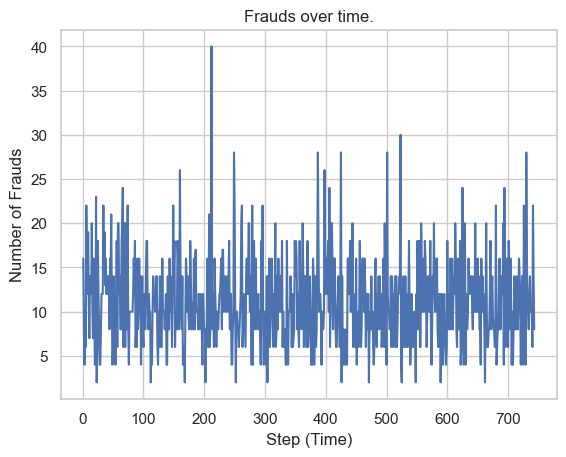

In [20]:
fraud_per_step = df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(fraud_per_step.index,fraud_per_step.values,label='Frauds per step')
plt.xlabel('Step (Time)')
plt.ylabel('Number of Frauds')
plt.title('Frauds over time.')
plt.grid(True)
plt.show()

In [21]:
df.drop(columns='step',inplace=True)

In [22]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [23]:
top_senders = df['nameOrig'].value_counts().head(10)

In [24]:
top_receivers = df['nameDest'].value_counts().head(10)

In [25]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [26]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [27]:
fraud_users = df[df['isFraud']==1]['nameOrig'].value_counts().head(10)

In [28]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [29]:
fraud_types = df[df['type'].isin(['TRANSFER','CASH_OUT'])]

In [31]:
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

Text(0.5, 1.0, 'Fraud Distribution in Transfer & Cash_Out')

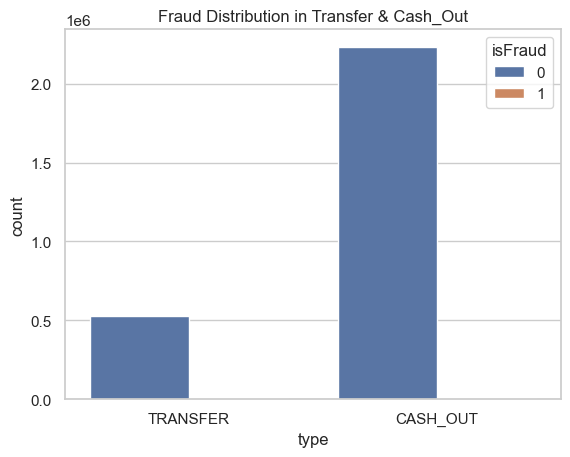

In [32]:
sns.countplot(data=fraud_types,x='type',hue='isFraud')
plt.title('Fraud Distribution in Transfer & Cash_Out')

In [34]:
corr = df[['amount',
           'oldbalanceOrg',
           'newbalanceOrig',
           'oldbalanceDest',
           'newbalanceDest',
           'isFraud']].corr()

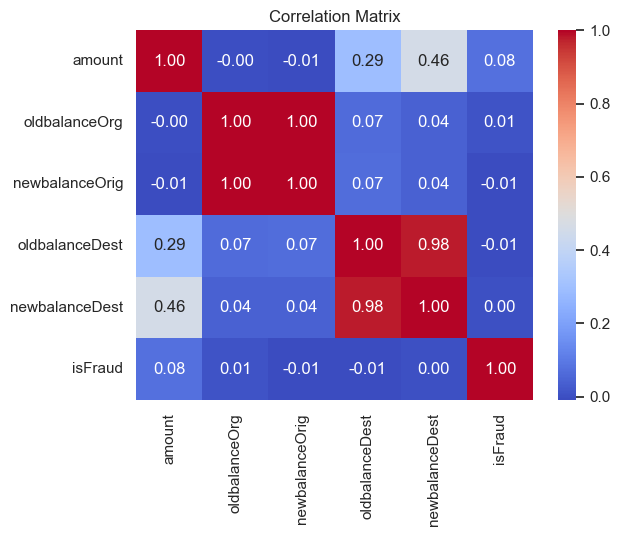

In [35]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [37]:
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER', 'CASH_OUT']))
]

In [38]:
len(zero_after_transfer)

1188074

In [39]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [42]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [43]:
df_model = df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [44]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [50]:
categorical = ['type']
numeric = ['amount','oldbalanceOrg','oldbalanceDest','newbalanceDest']

In [51]:
y = df_model['isFraud']
X = df_model.drop('isFraud',axis=1)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y) 

In [53]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num',StandardScaler(),numeric),
        ('cat',OneHotEncoder(drop='first'),categorical)
    ],
    remainder ='drop'
)

In [54]:
pipeline = Pipeline([
    ('prep',preprocessor),
    ('clf',LogisticRegression(class_weight='balanced',max_iter=1000))
])

In [55]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [58]:
y_pred = pipeline.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96   1906322
           1       0.02      0.93      0.03      2464

    accuracy                           0.93   1908786
   macro avg       0.51      0.93      0.50   1908786
weighted avg       1.00      0.93      0.96   1908786



In [60]:
confusion_matrix(y_test,y_pred)

array([[1774753,  131569],
       [    175,    2289]], dtype=int64)

In [62]:
pipeline.score(X_test,y_test)*100

93.09802146495207

In [63]:
import joblib

joblib.dump(pipeline,'fraud_detection_pipeline.pkl')

['fraud_detection_pipeline.pkl']

In [66]:
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load('fraud_detection_pipeline.pkl')

st.title('Fraud Detection Prediction App')
st.markdown('Please enter the transaction details')
st.divider()

# User inputs
transaction_type = st.selectbox(
    'Transaction Type',
    ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEPOSIT']
)

amount = st.number_input('Amount', min_value=0.0, value=1000.0)
oldbalanceOrg = st.number_input('Old Balance (Sender)', min_value=0.0, value=10000.0)
newbalanceOrg = st.number_input('New Balance (Sender)', min_value=0.0, value=9000.0)
oldbalanceDest = st.number_input('Old Balance (Receiver)', min_value=0.0, value=5000.0)
newbalanceDest = st.number_input('New Balance (Receiver)', min_value=0.0, value=6000.0)

# Prediction button
if st.button('Predict'):

    input_data = pd.DataFrame([{
        'type': transaction_type,
        'amount': amount,
        'oldbalanceOrg': oldbalanceOrg,
        'newbalanceOrig': newbalanceOrg,
        'oldbalanceDest': oldbalanceDest,
        'newbalanceDest': newbalanceDest
    }])

    prediction = model.predict(input_data)[0]

    st.subheader(f'Prediction: {int(prediction)}')

    if prediction == 1:
        st.error('🚨 This transaction looks like FRAUD')
    else:
        st.success('✅ This transaction looks LEGITIMATE')

2025-12-15 16:40:35.518 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:40:37.003 
  command:

    streamlit run C:\Users\KARTHIKEYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-15 16:40:37.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:40:37.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:40:37.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:40:37.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:40:37.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 